In [1]:
import os
import numpy as np
import librosa
import soundfile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten



In [2]:
import zipfile
import os

# Path to your zip file
zip_path = "ravdess-data.zip"

# Unzip it to a folder
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("ravdess-data")  # You can name this whatever you like

print(" Dataset extracted successfully!")


 Dataset extracted successfully!


In [3]:
def extract_features(file_path):
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    return np.mean(mfccs.T, axis=0)


In [5]:
emotion_dict = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

features = []
labels = []

for folder, _, files in os.walk("ravdess-data"):
    for file in files:
        if file.endswith(".wav"):
            emotion_code = file.split("-")[2]
            emotion = emotion_dict.get(emotion_code)
            file_path = os.path.join(folder, file)
            data = extract_features(file_path)
            features.append(data)
            labels.append(emotion)


C:\ProgramData\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


In [6]:
X = np.array(features)
y = np.array(labels)

# Encode text labels to numbers
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
model = Sequential()
model.add(Dense(256, input_shape=(40,), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='softmax'))  # 8 emotions

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


C:\Users\qures\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │          10,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,168 (203.78 KB)

 Trainable params: 52,168 (203.78 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)


Epoch 1/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1450 - loss: 2.0582 - val_accuracy: 0.1063 - val_loss: 2.0680
Epoch 2/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1405 - loss: 2.0555 - val_accuracy: 0.1063 - val_loss: 2.0679
Epoch 3/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1528 - loss: 2.0576 - val_accuracy: 0.1063 - val_loss: 2.0677
Epoch 4/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1473 - loss: 2.0564 - val_accuracy: 0.1063 - val_loss: 2.0679
Epoch 5/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1504 - loss: 2.0598 - val_accuracy: 0.1063 - val_loss: 2.0677
Epoch 6/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1370 - loss: 2.0676 - val_accuracy: 0.1063 - val_loss: 2.0677
Epoch 7/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1473 - loss: 2.0592 - val_accuracy: 0.1063 - val_loss: 2.0678
Epoch 8/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1439 - loss: 2.0555 - val_accuracy: 0

In [12]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

print("Accuracy:", accuracy_score(y_test, y_pred_labels))
print(classification_report(y_test, y_pred_labels, target_names=le.classes_))


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Accuracy: 0.11979166666666667
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00        79
        calm       0.12      1.00      0.21        69
     disgust       0.00      0.00      0.00        84
     fearful       0.00      0.00      0.00        80
       happy       0.00      0.00      0.00        82
     neutral       0.00      0.00      0.00        42
         sad       0.00      0.00      0.00        61
   surprised       0.00      0.00      0.00        79

    accuracy                           0.12       576
   macro avg       0.01      0.12      0.03       576
weighted avg       0.01      0.12      0.03       576



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


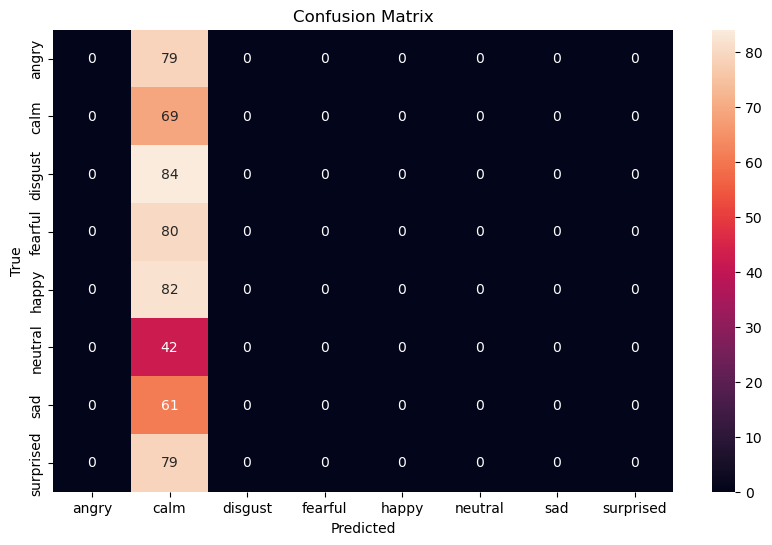

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
